# Take-Home Exam Math Derivations

In [102]:
%load_ext pymatbridge
import sympy as sp
sp.init_printing()

from sympyutils import *

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-914e633b-4e17-4ec5-b45b-44b5a9022904
Send 'exit' command to kill the server
......MATLAB started and connected!


/home/selimb/miniconda2/envs/science/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


## Question 1

In [2]:
all_c = sp.symbols('c1:5', real=True)
num_c = len(all_c)
x = sp.symbols('x', real=True)
h = sp.symbols('h_e', real=True)
all_xe = sp.symbols('x1:5', real=True)
# all_xe = sp.symbols('x_e x_{e+1}')
all_xe

In [3]:
u = sum( [all_c[i]*x**i for i in range(num_c)] )
show(u, 'u_h^e(x)')

<IPython.core.display.Math object>

In [4]:
all_d = sp.symbols('u_1:5')
# all_d = sp.symbols('Delta_1:5')
all_d

In [5]:
d_eqs = []
for i, xe in enumerate(all_xe):
    d1 = u.subs(x, xe)
    d_eqs.append(d1)
d_names = [sp.latex(d) for d in all_d]
show_list(d_eqs, d_names)

<IPython.core.display.Math object>

In [6]:
def pop_A(i, j):
    di = d_eqs[i]
    return di.coeff(all_c[j])

In [7]:
A = sp.Matrix(num_c, num_c, pop_A)
sub_x = [0, h/3, 2*h/3, h]
A = A.subs(zip(all_xe, sub_x))
show(A, 'A')

<IPython.core.display.Math object>

In [8]:
D = sp.Matrix(all_d)
show(D, 'D')

<IPython.core.display.Math object>

In [9]:
C = A.inv().dot(D)
C = sp.Matrix(C)

In [10]:
show(C, 'C = A^{-1}D')

<IPython.core.display.Math object>

In [11]:
xbar = sp.symbols(r'\bar{x}')

In [12]:
uu = u.subs( [(all_c[i], C[i]) for i in range(num_c)] ).subs(x, xbar)
uu = uu.simplify().expand()

In [13]:
# Some magic to extract the terms
all_phi = []
for d in all_d:
    coeff = uu.coeff(d).simplify()
    all_phi.append(coeff)
num_phi = len(all_phi)
phi_names = [r'\psi_%1i' % (i+1) for i in range(num_phi)]

In [14]:
show_list(all_phi, phi_names)

<IPython.core.display.Math object>

In [15]:
f0, xa = sp.symbols('f_0 x_a')
f = f0*(xbar + xa)/h
show(f, r'f(\bar{x})')

<IPython.core.display.Math object>

In [16]:
phi2 = all_phi[1]

In [17]:
I = sp.integrate(f*phi2, (xbar, 0, h))
show(I, r'\int_0^h f \phi_2 d\bar{x}')

<IPython.core.display.Math object>

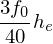

In [18]:
I.subs(xa, 0)

## Question 3

In [79]:
x, alpha, h, xa = sp.symbols(r'\bar{x} alpha h x_a', real=True, positive=True)
a, c = sp.symbols('a c', real=True)
f = -(x + xa)**2  # in local coordinates

In [80]:
# The above is good
# Now we construct K
def integ(integrand):
    return sp.integrate(integrand, (x, 0, h)).simplify().simplify()

def pop_K1(i,j):
    integrand = a*sp.diff(phis[i],x)*sp.diff(phis[j],x)
    return integ(integrand)

def pop_K2(i,j):
    integrand = c*phis[i]*phis[j]
    return integ(integrand)

def pop_F(i,j):
    integrand = phis[i]*f
    return integ(integrand)

### Linear

In [81]:
phis = [1 - x/h, x/h]

In [82]:
N = 2
F = sp.Matrix(N, 1, pop_F)
show(F, 'F')

<IPython.core.display.Math object>

### Quadratic

In [83]:
phis = [
    (1 - x/h)*(1 - (1/alpha)*x/h),
    x/(alpha*(1-alpha)*h)*(1 - x/h),
    -(alpha/(1-alpha)*x/h)*(1 - (1/alpha)*x/h)
]
# Validate
pos = [0, alpha*h, h]
for phi in phis:
    print([phi.subs(x, p).simplify() for p in pos])

[1, 0, 0]
[0, 1, 0]
[0, 0, 1]


The above is good. 

Now, we find K and F

In [84]:
N = 3
K1 = sp.Matrix(N, N, pop_K1)
K2 = sp.Matrix(N, N, pop_K2)
F = sp.Matrix(N, 1, pop_F)

In [85]:
show_add([K1, K2], 'K^e')

<IPython.core.display.Math object>

Well this isn't pretty. Just to make sure it's correct, let's plug in $\alpha = 1/2$ and compare with
the result derived in Reddy. 

In [86]:
subs = [(alpha, alpha/(2*alpha))]  # Dirty trick to get 1/2 as fraction instead of float
show_add([K1.subs(subs), K2.subs(subs)], r'K^e\big|_{\alpha=0.5}')

<IPython.core.display.Math object>

That's correct. 

Now on to $F$

In [87]:
show(F, 'F')

<IPython.core.display.Math object>

And compare with the result in Example 3.2.1

In [88]:
show(F.subs(subs), r'F\big|_{\alpha=0.5}')

<IPython.core.display.Math object>

That's correct as well. Great. 

In [94]:
# So we can copy-paste into MATLAB
def fmt(expr):
    return str(expr).replace('**','^').replace('x_a', 'xa')
for i in range(3):
    for j in range(i,3):
        print(' = '.join( ['Kelem(%i,%i)' % (i+1,j+1), 
                          fmt(K1[i,j] + K2[i,j])] ) + ';')

for i in range(3):
    print(' = '.join( ['Felem(%i)' % (i+1), fmt(F[i])] ) + ';')

Kelem(1,1) = a/h + a/(3*alpha^2*h) + c*h*(10*alpha^2 - 5*alpha + 1)/(30*alpha^2);
Kelem(1,2) = a/(3*alpha^2*h*(alpha - 1)) - c*h*(5*alpha - 2)/(60*alpha^2*(alpha - 1));
Kelem(1,3) = -a*(3*alpha^2 - 3*alpha + 1)/(3*alpha*h*(alpha - 1)) + c*h*(10*alpha^2 - 10*alpha + 3)/(60*alpha*(alpha - 1));
Kelem(2,2) = a/(3*alpha^2*h*(alpha^2 - 2*alpha + 1)) + c*h/(30*alpha^2*(alpha^2 - 2*alpha + 1));
Kelem(2,3) = -a/(3*alpha*h*(alpha^2 - 2*alpha + 1)) - c*h*(5*alpha - 3)/(60*alpha*(alpha^2 - 2*alpha + 1));
Kelem(3,3) = a*(3*alpha^2 - 6*alpha + 4)/(3*h*(alpha^2 - 2*alpha + 1)) + c*h*(10*alpha^2 - 15*alpha + 6)/(30*(alpha^2 - 2*alpha + 1));
Felem(1) = -h*(5*alpha*h^2 + 20*alpha*h*xa + 30*alpha*xa^2 - 3*h^2 - 10*h*xa - 10*xa^2)/(60*alpha);
Felem(2) = h*(3*h^2 + 10*h*xa + 10*xa^2)/(60*alpha*(alpha - 1));
Felem(3) = -h*(30*alpha*xa^2 - 12*h^2 + 15*h*(alpha*h - 2*xa) + 20*xa*(2*alpha*h - xa))/(60*alpha - 60);


### Analytical Solution

In [108]:
%%matlab
x = sym('x');
u(x) = sym('u(x)');
dsolve(-diff(u,2) - u + x^2, u(0) == 0, u(1) == 0)

 
ans =
 
2*cos(x) + x^2 - (sin(x)*(2*cos(1) - 1))/sin(1) - 2
 
